# BPSK

## Pythonのバージョン確認と，必要なライブラリをインポートする．

In [38]:
!python3 --version

import random

Python 3.7.13


In [39]:
import matplotlib as makeMSL
import matplotlib.pyplot as plt
import numpy as np
import math

### 以下は$\mbox{erfc}$関数を読み込むためのライブラリ

In [40]:
from scipy import special

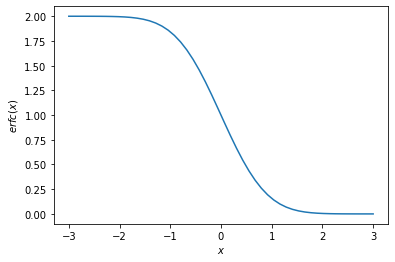

In [41]:
x = np.linspace(-3, 3)
plt.plot(x, special.erfc(x))
plt.xlabel('$x$')
plt.ylabel('$erfc(x)$')
plt.show()

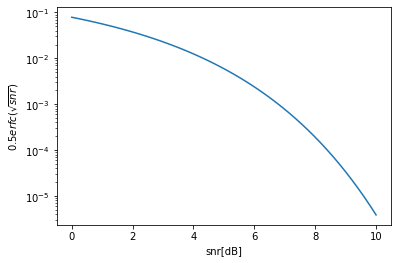

In [42]:
snr = np.linspace(0, 10)
plt.plot(
    snr, 
    0.5 * special.erfc(
        np.sqrt(
            np.power(10, snr / 10.0 ) 
        )
    )
)
plt.yscale('log')
plt.xlabel('snr[dB]')
plt.ylabel('$0.5  erfc(\sqrt{snr})$')
plt.show()

## BPSK等のための関数準備

### M系列を静的に作成する関数

In [43]:
'''
  M系列を静的に作成する関数
  @param 略
  @return M系列 np
'''

def createMLS(
    N = 7, #次数
    a = 3, #帰還タップ
    b = 7, #帰還タップ
    X = 1000
):
  
  MLS = np.empty(X, dtype = int)

  for i in range(X) :
    if i < N :
      MLS[i] = random.randrange(2)
    else :
      MLS[i] = MLS[i - a] ^ MLS[i - b]
  

  return MLS


### 変調（BPSK）

In [44]:
'''
  0/1を-1/+1に復調
  @param dataOrigin     np もとの0/1データ
  @param encodeMode   str 復調方式
  @return dataEncoded   np -1/+1データ
'''

def encode(dataOrigin, encodeMode = "BPSK"):
  if encodeMode == "BPSK":
    dataEncoded = np.where( dataOrigin == 0, -1, 1 )
    return dataEncoded

#### 例

In [45]:
dataOriginExanple = np.array( [0, 1, 0, 1, 0] )

print("元データ")
print( dataOriginExanple )

print("変調後")
print( encode( dataOriginExanple ) )

元データ
[0 1 0 1 0]
変調後
[-1  1 -1  1 -1]


### ガウス確率変数をサンプリングする関数(Box-Muller法)

#### Box-Muller法の概要
一様分布に従う確率変数$x_1, x_2 \sim U(0,1)$を次の変換$(x_1, x_2) \mapsto (y_1, y_2)$を施すことで，変換先の確率変数は標準正規分布に従う．すなわち \\

$$
y_1 = \sqrt{
  -2 \ln{x_1}
} \cdot \cos 2 \pi x_2 \\
y_2 = \sqrt{
  -2 \ln{x_2}
} \cdot \sin 2 \pi x_1
$$
という変換に対して

$$
y_1, y_2 \sim \mathcal{N}(0, 1)
$$
となる．

また，平均$\mu$,分散$\sigma^2$のガウス分布$\mathcal{N}(\mu, \sigma^2)$に従う確率変数$z \sim \mathcal{N}(\mu, \sigma^2)$のサンプリングは
$$
z = \sigma \cdot y + \mu
$$
をとすることで十分.

#### サンプリング関数

In [46]:
'''
ガウス分布に従う確率変数をサンプリングする
  @param mean    float 平均 
  @param variance float 分散
  @return gaussian float ガウス分布に従う確率変数１つ
'''

def gaussianByBoxMuller(
    mean = 0.0,
    variance = 1.0
) :
  #確率変数x_1, x_2 ~ U(0, 1)
  x_1 = random.uniform(0.0, 1.0)
  x_2 = random.uniform(0.0, 1.0)

  #確率変数x_1, x_2を変換して標準正規分布に従う確率変数y_1, y_2とする
  y_1 = math.sqrt(-2.0 * math.log(x_1)) * math.cos(2.0 * math.pi * x_2)
  y_2 = math.sqrt(-2.0 * math.log(x_2)) * math.sin(2.0 * math.pi * x_1)

  floatGaussian = math.sqrt( variance ) * y_1 + mean
  return floatGaussian

##### 例

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        1.0000e+00, 3.0000e+00, 5.0000e+00, 1.1000e+01, 4.0000e+00,
        9.0000e+00, 3.1000e+01, 3.1000e+01, 6.5000e+01, 7.6000e+01,
        1.1800e+02, 1.4600e+02, 2.2900e+02, 3.1200e+02, 4.5500e+02,
        6.5800e+02, 7.8600e+02, 1.1360e+03, 1.5740e+03, 2.0090e+03,
        2.5390e+03, 3.2220e+03, 4.0690e+03, 5.2650e+03, 6.4430e+03,
        7.8460e+03, 9.4320e+03, 1.1090e+04, 1.3375e+04, 1.5636e+04,
        1.8071e+04, 2.0528e+04, 2.3124e+04, 2.6020e+04, 2.8622e+04,
        3.1374e+04, 3.3962e+04, 3.6530e+04, 3.8011e+04, 3.9751e+04,
        4.1093e+04, 4.2108e+04, 4.2263e+04, 4.2486e+04, 4.1868e+04,
        4.0664e+04, 3.9395e+04, 3.7687e+04, 3.5093e+04, 3.3292e+04,
        3.0158e+04, 2.7713e+04, 2.4881e+04, 2.2399e+04, 1.9430e+04,
        1.7093e+04, 1.4613e+04, 1.2491e+04, 1.0616e+04, 8.7140e+03,
        7.0220e+03, 5.8280e+03, 4.6810e+03, 3.72

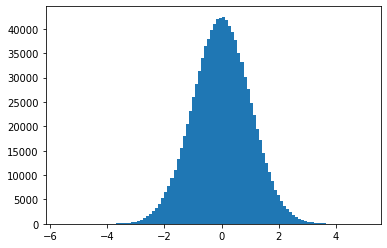

In [47]:
gaussianListExample = [ gaussianByBoxMuller() for _ in range(1000000) ]
plt.hist(gaussianListExample, bins = 100)

標準正規分布に従っていることがわかる．

### SNRから分散を計算する関数

$$
SNR [\mbox{dB}]  = 10 \log_{10} \frac{P_S}{P_N} = 10 \log_{10} \frac{1}{ 2 \sigma^2 }
$$
より
$$
\mbox{分散} \sigma^2 = \frac{1}{2} \cdot 10^{- \mbox{SNR}/10 }
$$

In [48]:
def calcVarianceFromSNR(
    snr
):
  return 0.5 * math.pow(10.0, - snr / 10.0 )

#### 例
$\mbox{SNR} = 10[\mbox{dB}]$のとき式変形より分散$\sigma^2 = 0.05$であることが以下の実行からも確認できる．

In [49]:
print( calcVarianceFromSNR(10) )

0.05


### 復調
ノイズが乗った信号$y$を復調する． \\
BPSKの場合，$y$がマイナスなら$-1$として送られたと見なし，元のデータを$0$とする． $y$がプラスなら$+1$として送られたと見なし，元のデータを$1$とする． \\
すなわち
$$
\hat{x} = 
\left\{
\begin{array}{ll}
0  &  ( \mbox{if} \ y \leq 0 ) \\
1 & ( \mbox{otherwise}  )
\end{array} 
\right.
$$

In [50]:
'''
  受け取った信号の-/+を0/1に復調
  @param dataReceived  np 受け取ったデータ
  @param decodeMode   str 復調方式
  @return dataDecoded  np  -1/+1データ
'''

def decode(dataReceived, decodeMode = "BPSK"):
  if decodeMode == "BPSK":
    dataDecoded = np.where( dataReceived <= 0, 0, 1 )
    return dataDecoded

### BER計算
送信したデータセットと，復調したデータセットの中身のうち正しく予測したものの割合

In [51]:
'''
  BER
  @param dataOrigin    np   送信したデータセット
  @param dataDecoded np   予測したデータセット
  @return               float ビット誤り率(BER: Bit Error Rate)
'''
def calcBER(
    dataOrigin,
    dataDecoded
) : 
  return np.count_nonzero(
      dataOrigin != dataDecoded
  ) / dataOrigin.size

### 以上をまとめたSNRに対してBERを計算する関数
1. M系列を用いて送信データを作成する
2. 送信データの$1 → 1，0 → -1$に変調し，送信信号を作
成する
3. 平均 $0$ ，分散 $2σ^2$の白色ガウス雑音(Box-Mullerで
作った雑音)を送信信号に加え，受信信号とする
4. 受信信号を$0$と$1$の受信データに復調する
5. 受信データと送信データを比較し，ビット誤り率
(BER:Bit Error Rate)を算出する

In [52]:
'''
  @param snr        SNR(信号対雑音電力比) [dB]
  @param dataSize  試行回数
  @return ber       ビット誤り率(BER: Bit Error Rate)
'''
def calcBERofBPSKfromSNR(
    snr,
    dataSize = 1000000
) : 
  #M系列で送信データを作成
  dataOrigin = createMLS(X = dataSize)

  #送信データの1を１，0を-1に変調し，送信信号を作成する
  dataEncoded = encode(dataOrigin, encodeMode = "BPSK")

  #平均０,分散2σ^2 の白色雑音(Box-Mullerで作った雑音)を送信信号に加え，受信信号とする
  dataReceived = dataEncoded + [
                    gaussianByBoxMuller(mean = 0.0, variance = 1.0 * calcVarianceFromSNR(snr) ) 
                    for _ in range(dataSize)
                  ]

  #. 受信信号を0と1の受信データに復調する
  dataDecoded = decode(dataReceived, decodeMode = "BPSK")

  #受信データと送信データを比較し，ビット誤り率(BER:Bit Error Rate)を算出する
  ber = calcBER( dataOrigin, dataDecoded)

  return ber

## 実行

### パラメータ

In [53]:
#試行回数
X = 1000000

#送信電力1
Ps = 1

#SNR 0 ~ 10[dB]
SNR_MIN = 0
SNR_MAX = 10

In [54]:
#定義域(SNR)
N = (SNR_MAX - SNR_MIN) * 40
SNR = np.linspace(SNR_MIN, SNR_MAX, N)

#値域(BER)
BER = [ calcBERofBPSKfromSNR( SNR[n] ) for n in range (N) ]

### 実行結果

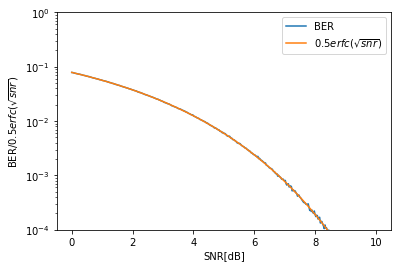

In [57]:
plt.plot(
    SNR,
    BER,
    label = "BER"
)

plt.plot(
    SNR, 
    0.5 * special.erfc(
        np.sqrt(
            np.power(10, SNR / 10.0 ) 
        )
    ),
    label = "$0.5  erfc(\sqrt{snr})$"
)

plt.yscale('log')

plt.ylim(10 ** (-4), 1)

plt.xlabel("SNR[dB]")
plt.ylabel("BER/$0.5  erfc(\sqrt{snr})$")

plt.savefig("BER_SNR_BPSK.png")

plt.legend()
plt.show()

たしかに実験結果と，理論式が一致している．